Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN 

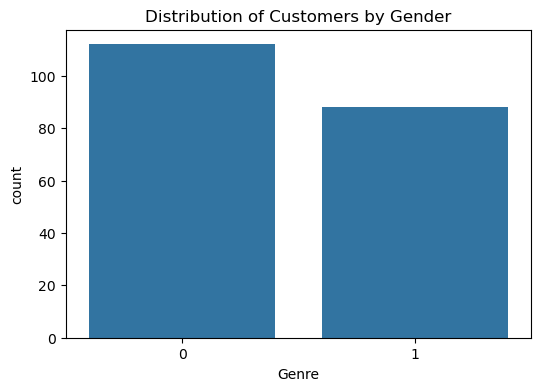

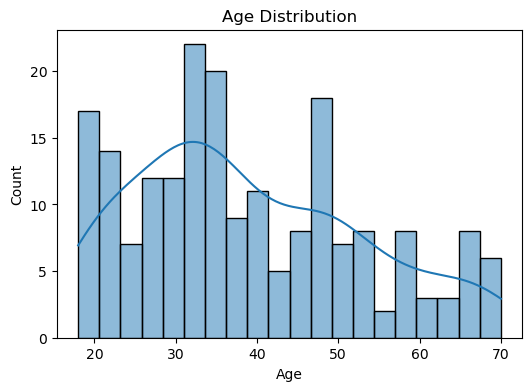

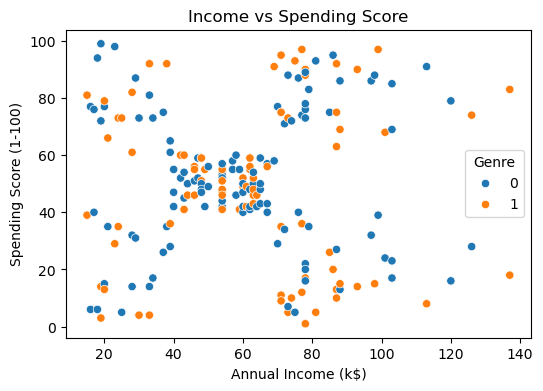

C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

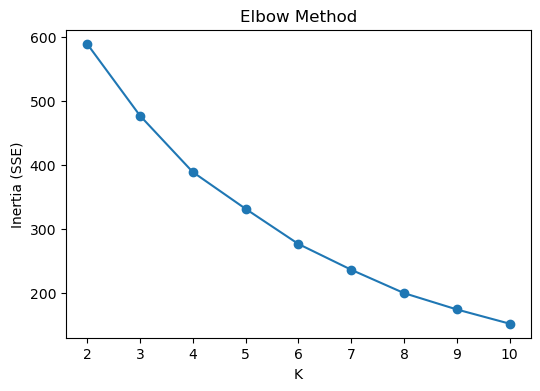

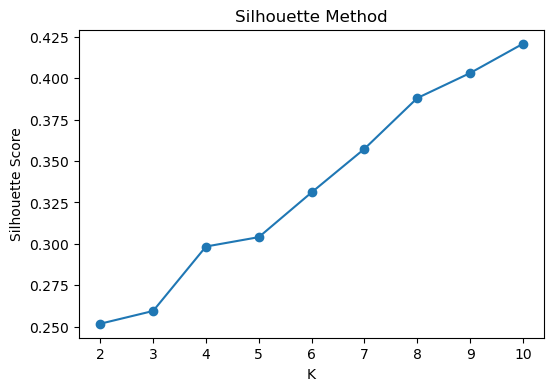

C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.461538  32.692308           86.538462               82.128205
1        0.448276  36.482759           89.517241               18.000000
2        0.000000  49.813953           49.232558               40.069767
3        0.407407  24.907407           39.722222               61.203704
4        1.000000  55.714286           53.685714               36.771429


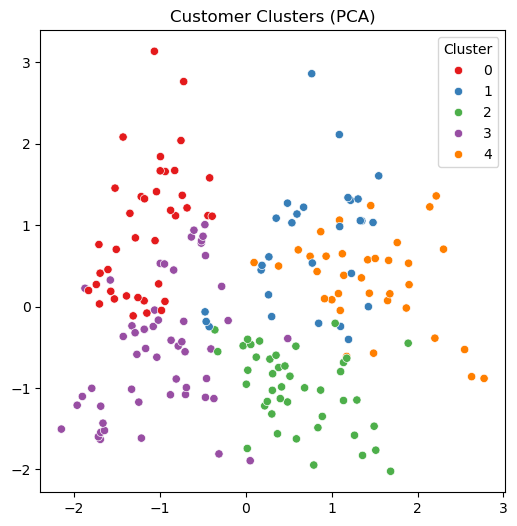

C:\Users\iyusr\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


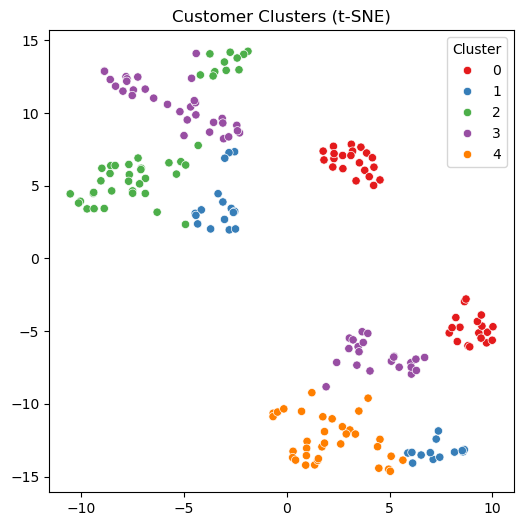


Cluster 0:
Size: 39
                             mean
Genre                    0.461538
Age                     32.692308
Annual Income (k$)      86.538462
Spending Score (1-100)  82.128205
Cluster                  0.000000

Cluster 1:
Size: 29
                             mean
Genre                    0.448276
Age                     36.482759
Annual Income (k$)      89.517241
Spending Score (1-100)  18.000000
Cluster                  1.000000

Cluster 2:
Size: 43
                             mean
Genre                    0.000000
Age                     49.813953
Annual Income (k$)      49.232558
Spending Score (1-100)  40.069767
Cluster                  2.000000

Cluster 3:
Size: 54
                             mean
Genre                    0.407407
Age                     24.907407
Annual Income (k$)      39.722222
Spending Score (1-100)  61.203704
Cluster                  3.000000

Cluster 4:
Size: 35
                             mean
Genre                    1.000000
Age        

In [1]:
# ==========================
# Task 2: Mall Customers Clustering
# ==========================

# ---- 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ---- 2) Load Dataset
df = pd.read_csv("Mall_Customers.csv")

print("Shape:", df.shape)
df.head()

# ---- 3) Basic Info
print(df.info())
print(df.describe(include="all"))

# ---- 4) Data Cleaning / Preprocessing
# Drop CustomerID (not useful for clustering)
df = df.drop(columns=["CustomerID"])

# Encode Gender (Genre)
df["Genre"] = LabelEncoder().fit_transform(df["Genre"])

# Features for clustering
X = df.values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 5) Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Genre")
plt.title("Distribution of Customers by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Genre"])
plt.title("Income vs Spending Score")
plt.show()

# ---- 6) Optimal K using Elbow & Silhouette
inertia = []
silhouette = []
K_range = range(2,11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

# ---- 7) Fit Final KMeans (choose k=5 based on literature/plots)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

print(df.groupby("Cluster").mean())

# ---- 8) PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1")
plt.title("Customer Clusters (PCA)")
plt.show()

# ---- 9) t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="Set1")
plt.title("Customer Clusters (t-SNE)")
plt.show()

# ---- 10) Insights / Strategies
for c in sorted(df["Cluster"].unique()):
    segment = df[df["Cluster"]==c]
    print(f"\nCluster {c}:")
    print(f"Size: {len(segment)}")
    print(segment.describe().T[["mean"]])
